#### Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
sns.set()

#### Importing Dataset

In [2]:
dataset = pd.read_csv('../Dataset/Ads_CTR_Optimisation.csv')
dataset
# Index is a user
# Each user watches 10 different versions of the Ad

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


#### Implementing UCB

In [18]:
N = dataset.shape[0]
d = dataset.shape[1]
ads_selected = []
number_of_ads_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (number_of_ads_selections[i] > 0):
            average_reward = sums_of_rewards[i] / number_of_ads_selections[i]
            delta_i = np.sqrt(3/2 * np.log(n + 1) / number_of_ads_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i 
    ads_selected.append(ad) 
    number_of_ads_selections[ad] = number_of_ads_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

#### Visualizing the result

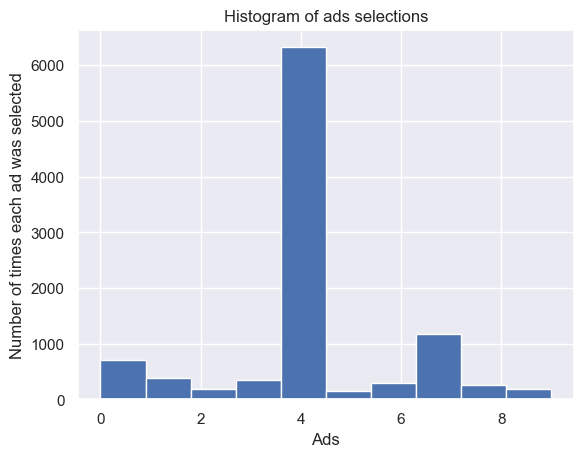

In [19]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

##### Ad[4] => Ad5 is the winner

In [ ]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (number_of_ads_selections[i] > 0):
            average_reward = sums_of_rewards[i] / number_of_ads_selections[i]
            delta_i = np.sqrt(3/2 * np.log(n + 1) / number_of_ads_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    number_of_ads_selections[ad] = number_of_ads_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward